## Machine Learning for Decision Making Predictions 

In [1]:
import pandas as pd
import numpy as np

ds_kb= pd.read_excel('HSM_new_data.xlsx', sheet_name= 'all_data')

# recoding the roles 
role=['Business Owner', 
      'Business Owner & Community Leader', 
      'Business Owner & Community Leader & EM',
      'Business Owner & Workforce',
      'Business Owner & EM',
      'NRPO Ockracoke' ,
      'Workforce & Citizen',
      'Community Leader',
      'Emergency Manager', 
      'Workforce', 
      'Community Leader & Workforce',
      'Citizen',
     'Community Leader & Citizen']
new_code=['BO', 
          'BO & CL', 
          'BO & CL & EM',
          'BO & W',
          'BO & EM',
          'NRPO',
          'W & CZ',
          'CL',
          'EM',
          'W',
          'CL & W',
          'CZ',
         'CL & CZ']

ds_kb['Role_acrn'] = ds_kb['Role'].replace(role, new_code)


# recoding BF 
d_cd= [1]
n_cd= [2]
ds_kb['dc_2f_kb']= ds_kb['BF_kb'].replace(d_cd, n_cd)

# addubg BB and BF
ds_kb ['dc_b_f_kb'] = ds_kb['dc_2f_kb'] + ds_kb['BB_kb']

# renaming the actions 
action=[0, 1, 2, 3]
act_name=['No Action', 'BB', 'BF', 'Both']

ds_kb['Action'] = ds_kb['dc_b_f_kb'].replace(action, act_name)

# adding Def. and Imp. for Huristic
ds_kb['Huristic']= ds_kb['Defense_pc'] + ds_kb['Impression_pc']

ds_kb.head()

,Interview_no,Role,Defense,Impression,Accuracy,Total,Defense_pc,Impression_pc,Accuarcy_pc,BB,BF,BB_kb,BF_kb,risk_1NHg_2Hg,Role_acrn,dc_2f_kb,dc_b_f_kb,Action,Huristic
0,H1,Business Owner,7,3,9,19,36.842105,15.789474,47.368421,0.0,1.0,1,0,2.0,BO,0,1,BB,52.631579
1,H10,Business Owner & EM,5,0,7,12,41.666667,0.000000,58.333333,0.0,0.0,1,0,NaN,BO & EM,0,1,BB,41.666667
2,H11,Business Owner & Community Leader,7,2,7,16,43.750000,12.500000,43.750000,1.0,1.0,1,1,2.0,BO & CL,2,3,Both,56.250000
3,H14,Business Owner & EM,0,12,22,34,0.000000,35.294118,64.705882,0.0,0.0,1,0,NaN,BO & EM,0,1,BB,35.294118
4,H15,Business Owner,15,17,2,34,44.117647,50.000000,5.882353,1.0,1.0,1,0,2.0,BO,0,1,BB,94.117647


In [2]:
ds_kb['Role_acrn'].value_counts()

BO              12
CL               8
BO & CL          6
NRPO             5
EM               4
W & CZ           3
CL & W           3
BO & EM          2
BO & W           2
CZ               2
W                2
BO & CL & EM     1
CL & CZ          1
Name: Role_acrn, dtype: int64

In [3]:
dt_stk= ds_kb[['Defense_pc', 'Impression_pc', 'Accuarcy_pc', 'Role_acrn']]

dt_bo=(dt_stk[ dt_stk['Role_acrn'].isin(['BO','BO & CL', 'BO & CL & EM','BO & W','BO & EM','NRPO'])]).mean().round(2)
print('Business owner ')
dt_bo

Business owner 


/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_3362/3054805090.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt_bo=(dt_stk[ dt_stk['Role_acrn'].isin(['BO','BO & CL', 'BO & CL & EM','BO & W','BO & EM','NRPO'])]).mean().round(2)


Defense_pc       23.52
Impression_pc    34.20
Accuarcy_pc      42.29
dtype: float64

In [4]:
dt_cl=(dt_stk[dt_stk['Role_acrn'].isin(['BO & CL', 'BO & CL & EM','CL', 'CL & W','CL & CZ'])]).mean().round(2)
print('Community leader')
dt_cl

Community leader


/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_3362/3496334468.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt_cl=(dt_stk[dt_stk['Role_acrn'].isin(['BO & CL', 'BO & CL & EM','CL', 'CL & W','CL & CZ'])]).mean().round(2)


Defense_pc       23.35
Impression_pc    35.47
Accuarcy_pc      41.18
dtype: float64

In [5]:
dt_w=(dt_stk[dt_stk['Role_acrn'].isin(['BO & W', 'W & CZ', 'W','CL & W'])]).mean().round(2)
print('Workforce')
dt_w

Workforce


/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_3362/2756862195.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt_w=(dt_stk[dt_stk['Role_acrn'].isin(['BO & W', 'W & CZ', 'W','CL & W'])]).mean().round(2)


Defense_pc       24.79
Impression_pc    36.43
Accuarcy_pc      38.78
dtype: float64

In [6]:
dt_em=(dt_stk[dt_stk['Role_acrn'].isin(['BO & CL & EM','BO & EM', 'EM'])]).mean().round(2)
print('Emergency manager')
dt_em

Emergency manager


/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_3362/2606261347.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt_em=(dt_stk[dt_stk['Role_acrn'].isin(['BO & CL & EM','BO & EM', 'EM'])]).mean().round(2)


Defense_pc       12.78
Impression_pc    24.85
Accuarcy_pc      62.37
dtype: float64

In [7]:
dt_cz=(dt_stk[dt_stk['Role_acrn'].isin(['W & CZ','CZ','CL & CZ'])]).mean().round(2)
print('Citizen')
dt_cz

Citizen


/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_3362/312412382.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt_cz=(dt_stk[dt_stk['Role_acrn'].isin(['W & CZ','CZ','CL & CZ'])]).mean().round(2)


Defense_pc       42.41
Impression_pc    28.11
Accuarcy_pc      29.48
dtype: float64

In [8]:
dt_s_rl=(dt_stk[dt_stk['Role_acrn'].isin(['BO', 'CL','EM','NRPO','W','CZ'])]).mean().round(2)
print('Single role')
dt_s_rl

Single role


/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_3362/3319193586.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt_s_rl=(dt_stk[dt_stk['Role_acrn'].isin(['BO', 'CL','EM','NRPO','W','CZ'])]).mean().round(2)


Defense_pc       20.69
Impression_pc    39.21
Accuarcy_pc      40.11
dtype: float64

In [9]:
dt_m_rl=(dt_stk[dt_stk['Role_acrn'].isin([ 'BO & CL', 'BO & CL & EM',
          'BO & W','BO & EM',
          'W & CZ','CL & W','CL & CZ'])]).mean().round(2)
print('Multi role')
dt_m_rl

Multi role


/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_3362/3289255403.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'W & CZ','CL & W','CL & CZ'])]).mean().round(2)


Defense_pc       27.09
Impression_pc    28.24
Accuarcy_pc      44.67
dtype: float64

In [10]:
dt_stkh = {
  "Single Role": [42.41, 28.11, 29.48],
  "Multiple Role": [27.09, 28.24, 44.67],
    "BO": [23.52, 34.24, 42.29],
  "CL": [23.35, 35.47, 41.18],
    "W": [24.79, 36.43, 38.78],
  "EM": [12.78, 24.85, 62.37],
     "CZ": [24.79, 36.43, 38.78]
 }

df_stkh = pd.DataFrame(dt_stkh, index = ["Defense", "Impression", "Accuracy"])

df_stkh

,Single Role,Multiple Role,BO,CL,W,EM,CZ
Defense,42.41,27.09,23.52,23.35,24.79,12.78,24.79
Impression,28.11,28.24,34.24,35.47,36.43,24.85,36.43
Accuracy,29.48,44.67,42.29,41.18,38.78,62.37,38.78


In [11]:
# pip install pysankey 

In [12]:
stk_dt= pd.read_excel('HSM_new_data.xlsx', sheet_name= 'stakeholder')
stk_dt.head()

,stakeholder,motive_pc,motive_typ
0,Single Role (n= 33),42.41,Defense (%)
1,Multiple Hats (n= 18),27.09,Defense (%)
2,BO (n= 28),23.52,Defense (%)
3,CL (n=8),23.35,Defense (%)
4,W (n= 10),24.79,Defense (%)


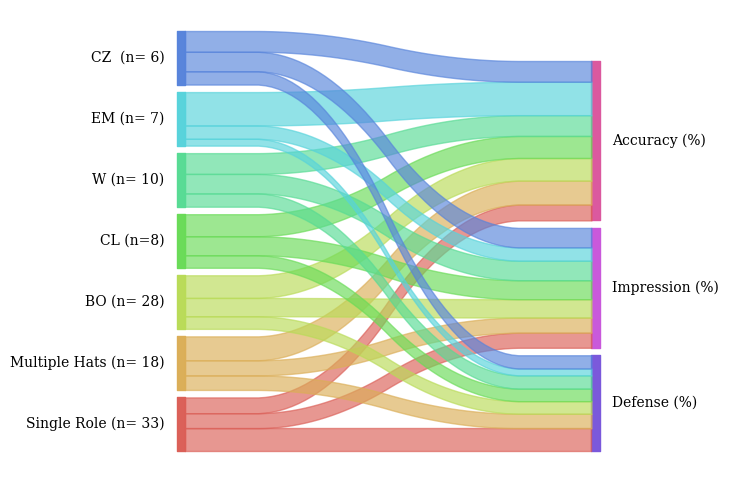

In [13]:
from pySankey.sankey import sankey as snk
stk_plot= snk(
    left= stk_dt["stakeholder"], right=stk_dt["motive_typ"], 
    leftWeight= stk_dt["motive_pc"], rightWeight=stk_dt["motive_pc"], 
    aspect=12, fontsize=10)
stk_plot

In [14]:
ds_kb.head()

,Interview_no,Role,Defense,Impression,Accuracy,Total,Defense_pc,Impression_pc,Accuarcy_pc,BB,BF,BB_kb,BF_kb,risk_1NHg_2Hg,Role_acrn,dc_2f_kb,dc_b_f_kb,Action,Huristic
0,H1,Business Owner,7,3,9,19,36.842105,15.789474,47.368421,0.0,1.0,1,0,2.0,BO,0,1,BB,52.631579
1,H10,Business Owner & EM,5,0,7,12,41.666667,0.000000,58.333333,0.0,0.0,1,0,NaN,BO & EM,0,1,BB,41.666667
2,H11,Business Owner & Community Leader,7,2,7,16,43.750000,12.500000,43.750000,1.0,1.0,1,1,2.0,BO & CL,2,3,Both,56.250000
3,H14,Business Owner & EM,0,12,22,34,0.000000,35.294118,64.705882,0.0,0.0,1,0,NaN,BO & EM,0,1,BB,35.294118
4,H15,Business Owner,15,17,2,34,44.117647,50.000000,5.882353,1.0,1.0,1,0,2.0,BO,0,1,BB,94.117647


## Stakeholder's Processing Motives 

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BO vs. BO & CL: Mann-Whitney-Wilcoxon test two-sided, P_val:8.144e-01 U_stat=3.900e+01
BO & CL & EM vs. BO & W: Mann-Whitney-Wilcoxon test two-sided, P_val:6.667e-01 U_stat=2.000e+00
BO & EM vs. NRPO: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=5.000e+00
W & CZ vs. CL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.333e-01 U_stat=2.000e+01
EM vs. W: Mann-Whitney-Wilcoxon test two-sided, P_val:8.515e-02 U_stat=0.000e+00
CL & W vs. CZ: Mann-Whitney-Wilcoxon test two-sided, P_val:4.000e-01 U_stat=1.000e+00


/Users/akibria/anaconda3/lib/python3.10/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


(<Axes: xlabel='Role_acrn', ylabel='Defense_pc'>,
  <statannotations.Annotation.Annotation at 0x144c92980>])

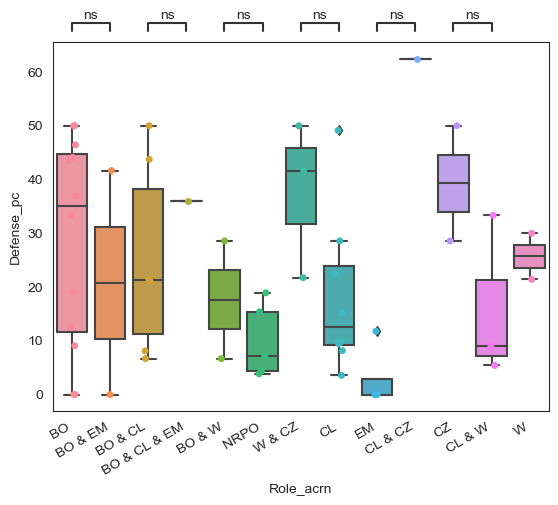

In [15]:
import seaborn as sns
from statannotations.Annotator import Annotator
sns.set_style('white')
ax= sns.boxplot(x= "Role_acrn", y= "Defense_pc", data= ds_kb)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment= 'right')
ax= sns.stripplot(x= "Role_acrn", y= "Defense_pc", data= ds_kb)

pairs=[('BO', 'BO & CL'), 
          ('BO & CL & EM', 'BO & W'),
          ('BO & EM', 'NRPO'),
          ('W & CZ','CL'),
          ('EM','W'),
          ('CL & W','CZ')]
order= ('BO', 
        'BO & CL', 
        'BO & CL & EM',
        'BO & W',
        'BO & EM',
        'NRPO',
        'W & CZ',
        'CL',
        'EM',
        'W',
        'CL & W',
        'CZ')

annotator = Annotator(ax, pairs, data=ds_kb, x= "Role_acrn", y= "Defense_pc", order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

<Axes: xlabel='Role_acrn', ylabel='Defense_pc'>

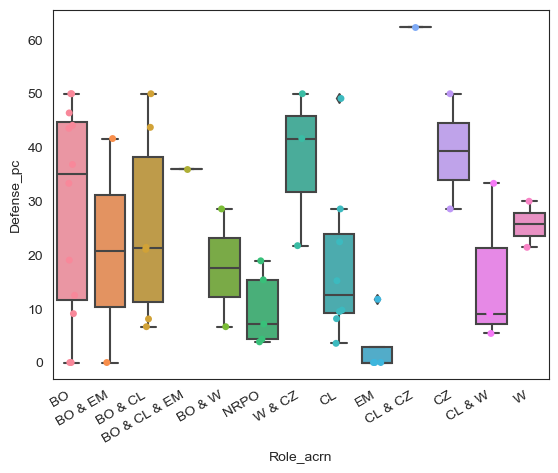

In [16]:
import seaborn as sns
from statannotations.Annotator import Annotator
sns.set_style('white')
ax= sns.boxplot(x= "Role_acrn", y= "Defense_pc", data= ds_kb)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment= 'right')
ax= sns.stripplot(x= "Role_acrn", y= "Defense_pc", data= ds_kb)
ax

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BO vs. BO & CL: Mann-Whitney-Wilcoxon test two-sided, P_val:5.108e-01 U_stat=4.350e+01
BO & CL & EM vs. BO & W: Mann-Whitney-Wilcoxon test two-sided, P_val:6.667e-01 U_stat=0.000e+00
BO & EM vs. NRPO: Mann-Whitney-Wilcoxon test two-sided, P_val:1.905e-01 U_stat=1.000e+00
W & CZ vs. CL: Mann-Whitney-Wilcoxon test two-sided, P_val:2.788e-01 U_stat=6.000e+00
EM vs. W: Mann-Whitney-Wilcoxon test two-sided, P_val:8.000e-01 U_stat=3.000e+00
CL & W vs. CZ: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=3.000e+00


/Users/akibria/anaconda3/lib/python3.10/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/akibria/anaconda3/lib/python3.10/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/akibria/anaconda3/lib/python3.10/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


(<Axes: xlabel='Role_acrn', ylabel='Impression_pc'>,
  <statannotations.Annotation.Annotation at 0x1449b09a0>])

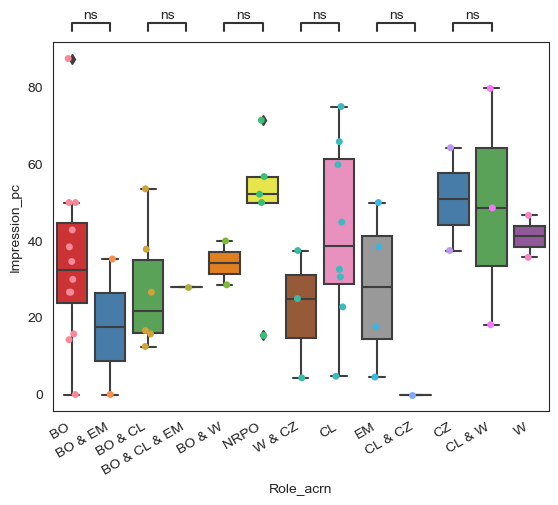

In [17]:
import seaborn as sns
from statannotations.Annotator import Annotator
sns.set_style('white')
ax= sns.boxplot(x= "Role_acrn", y= "Impression_pc", data= ds_kb, palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment= 'right')
ax= sns.stripplot(x= "Role_acrn", y= "Impression_pc", data= ds_kb)


pairs=[('BO', 'BO & CL'), 
          ('BO & CL & EM', 'BO & W'),
          ('BO & EM', 'NRPO'),
          ('W & CZ','CL'),
          ('EM','W'),
          ('CL & W','CZ')]
order= ('BO', 
        'BO & CL', 
        'BO & CL & EM',
        'BO & W',
        'BO & EM',
        'NRPO',
        'W & CZ',
        'CL',
        'EM',
        'W',
        'CL & W',
        'CZ')


annotator = Annotator(ax, pairs, data=ds_kb, x= "Role_acrn", y= "Impression_pc", order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BO vs. BO & CL: Mann-Whitney-Wilcoxon test two-sided, P_val:3.731e-01 U_stat=2.600e+01
BO & CL & EM vs. BO & W: Mann-Whitney-Wilcoxon test two-sided, P_val:6.667e-01 U_stat=0.000e+00
BO & EM vs. NRPO: Mann-Whitney-Wilcoxon test two-sided, P_val:3.810e-01 U_stat=8.000e+00
W & CZ vs. CL: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.200e+01
EM vs. W: Mann-Whitney-Wilcoxon test two-sided, P_val:1.333e-01 U_stat=8.000e+00
CL & W vs. CZ: Mann-Whitney-Wilcoxon test two-sided, P_val:2.000e-01 U_stat=6.000e+00


/Users/akibria/anaconda3/lib/python3.10/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/akibria/anaconda3/lib/python3.10/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
/Users/akibria/anaconda3/lib/python3.10/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


(<Axes: xlabel='Role_acrn', ylabel='Accuarcy_pc'>,
  <statannotations.Annotation.Annotation at 0x144ec5ff0>])

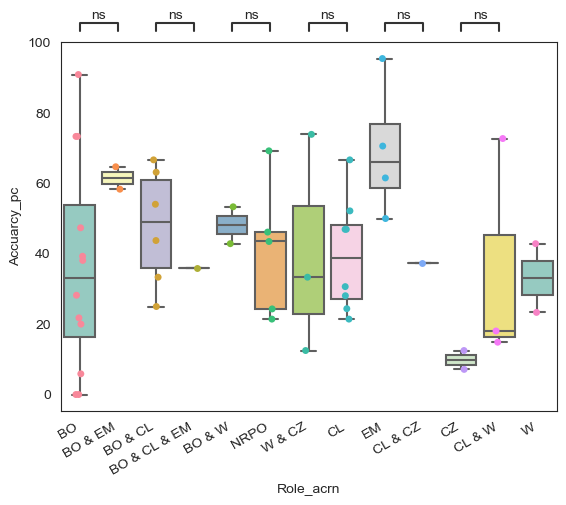

In [18]:
import seaborn as sns
from statannotations.Annotator import Annotator
sns.set_style('white')
ax= sns.boxplot(x= "Role_acrn", y= "Accuarcy_pc", data= ds_kb, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment= 'right')
ax= sns.stripplot(x= "Role_acrn", y= "Accuarcy_pc", data= ds_kb)

pairs=[('BO', 'BO & CL'), 
          ('BO & CL & EM', 'BO & W'),
          ('BO & EM', 'NRPO'),
          ('W & CZ','CL'),
          ('EM','W'),
          ('CL & W','CZ')]
order= ('BO', 
        'BO & CL', 
        'BO & CL & EM',
        'BO & W',
        'BO & EM',
        'NRPO',
        'W & CZ',
        'CL',
        'EM',
        'W',
        'CL & W',
        'CZ')


annotator = Annotator(ax, pairs, data=ds_kb, x= "Role_acrn", y= "Accuarcy_pc", order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

### Information processing motives for

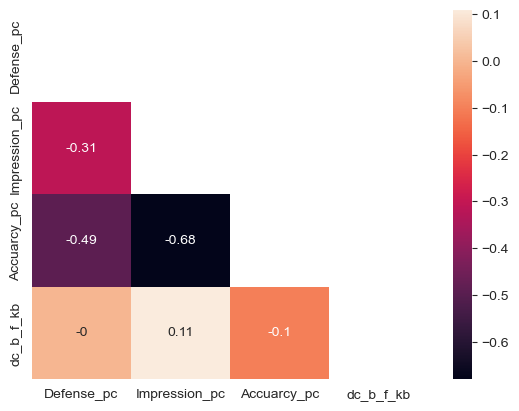

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# selecting columns of data 
cordt= ds_kb[['Defense_pc','Impression_pc','Accuarcy_pc', 
              'dc_b_f_kb']]
matrix = cordt.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.set_style("white")
sns.heatmap(matrix, annot=True, mask= mask)
plt.show()

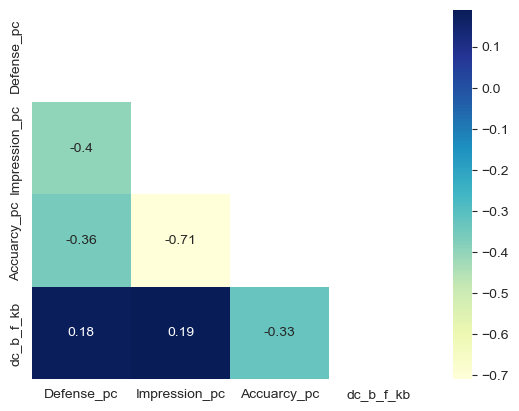

In [20]:
from sklearn.utils import resample 
import seaborn as sns
import matplotlib.pyplot as plt

n_samp = 5000
for i in range(n_samp):
    ndf = resample(cordt, replace=True)
    
corm= ndf.corr().round(2)
mask2 = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(corm, cmap= 'YlGnBu', annot= True, mask= mask2)
sns.set_style("white")
plt.show()

In [21]:

from sklearn.preprocessing import MinMaxScaler 

# selecting columns of data 
dtns= ds_kb[['Defense','Impression','Accuracy','Total','Defense_pc','Impression_pc','Accuarcy_pc','risk_1NHg_2Hg', 'dc_b_f_kb', 'Huristic']]

# normalization of the columns 
scale= MinMaxScaler()

nrdt= pd.DataFrame(scale.fit_transform(dtns), columns= dtns.columns, index= dtns.index)

nrdt.head()


,Defense,Impression,Accuracy,Total,Defense_pc,Impression_pc,Accuarcy_pc,risk_1NHg_2Hg,dc_b_f_kb,Huristic
0,0.159091,0.036585,0.214286,0.125926,0.589474,0.180451,0.496241,1.0,0.333333,0.503759
1,0.113636,0.000000,0.166667,0.074074,0.666667,0.000000,0.611111,NaN,0.333333,0.388889
2,0.159091,0.024390,0.166667,0.103704,0.700000,0.142857,0.458333,1.0,1.000000,0.541667
3,0.000000,0.146341,0.523810,0.237037,0.000000,0.403361,0.677871,NaN,0.333333,0.322129
4,0.340909,0.207317,0.047619,0.237037,0.705882,0.571429,0.061625,1.0,0.333333,0.938375


In [23]:
from sklearn.model_selection import RandomizedSearchCV

# No. of tree in random forest
n_estimators= [int(x) for x in np.linspace(start=200, stop= 2000, num=10)]

# number of features to consider at every split 
max_features= ['auto', 'sqrt']

# max no. of levels in tree 
max_depth= [int(x) for x  in np.linspace(10, 100, num= 11)]
max_depth.append(None)

# Min nu. os sample required to split a node
min_samples_split= [2, 5, 10]

# Min no. of samples required at each leaf node
min_samples_leaf= [1, 2, 4]

#method of selecting samples for taining each tree
bootstrap= [True, False] 

# create the random grid
random_grid= {'n_estimators': n_estimators,
             'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

pprint(random_grid)
              

{'bootstrap': [True, False],
 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [22]:
# hyper parameter tuning
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor (random_state= 42)
from pprint import pprint 
print('Parameters in use: \n')
pprint(rf.get_params())


Parameters in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [24]:
y


NameError: name 'y' is not defined

In [25]:
rf_random.best_params_

NameError: name 'rf_random' is not defined

In [26]:
from sklearn.model_selection import train_test_split
x= np.array (ds_kb[['Defense_pc','Impression_pc','Accuarcy_pc']])
y= np.array(ds_kb[[ 'dc_b_f_kb']])

In [27]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=.3, random_state= 42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(xtrain, ytrain)

/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_3362/3965759053.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


RandomForestClassifier()

In [30]:
print('Adaptation Action Class: ')
a= float(input('Defense (%): '))
b= float(input('Impression (%): '))
c= float(input('Accuracy (%): '))
         
features= np.array([[a,b,c]])
class_mod= model.predict(features)
print('Action Class: ', class_mod)

Adaptation Action Class: 


Defense (%):  2
Impression (%):  2
Accuracy (%):  2


Action Class:  [1]


## Adaptation Decision 

#### [0= No Action]  [1= BB]  [2= BF]  [3= Both]

In [31]:
forest= RandomForestClassifier()
y_pred= model.predict(xtest)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# accuracy score 
print( 'Model Accuracy: ', (accuracy_score(ytest, y_pred)).round(3))

Model Accuracy:  0.812


In [33]:
# confusion matrix

confusion_matrix(ytest, y_pred)

array([[ 0,  1,  0,  1],
       [ 0, 12,  1,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  0,  0]])

In [34]:
# evaluate random search 
def evaluate(model, xtest, ytest):
    predictions = model.predict(xtest)
    errors = abs(predictions - ytest)
    mape = 100 * np.mean(errors / ytest)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(xtrain, ytrain)
base_accuracy = evaluate(base_model, xtest, ytest)

Model Performance
Average Error: 0.3225 degrees.
Accuracy = -inf%.


/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_1364/3324297347.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(xtrain, ytrain)
/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_1364/3324297347.py:5: RuntimeWarning: divide by zero encountered in divide
  mape = 100 * np.mean(errors / ytest)


/var/folders/h7/sn4kkl7179lf25fhm8fdhnb80000gn/T/ipykernel_1364/2841250484.py:4: RuntimeWarning: invalid value encountered in divide
  mtx= mtx.astype('float') / mtx.sum(axis=1)[:, np.newaxis]


<function matplotlib.pyplot.show(close=None, block=None)>

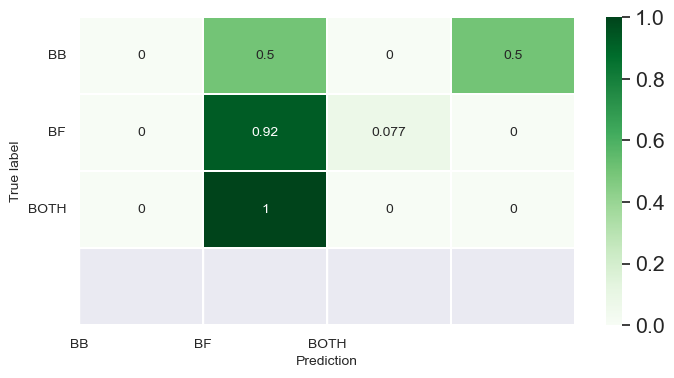

In [35]:
# reshap confusion matrix

mtx= confusion_matrix(ytest, y_pred)
mtx= mtx.astype('float') / mtx.sum(axis=1)[:, np.newaxis]

#plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (8,4))
sns.set(font_scale=1.4)
sns.heatmap(mtx, annot=True, annot_kws={'size': 10},
            cmap= plt.cm.Greens, linewidths= 0.2)

# labels addition
class_names= ['BB', 'BF', 'BOTH']
tick_mark= np.arange(len(class_names))
tick_mark1= tick_mark + .5
sns.set(font_scale=2)
plt.xticks(tick_mark, class_names, rotation= 0, fontsize=10)
plt.yticks(tick_mark1, class_names, rotation= 0, fontsize=10)
plt.xlabel('Prediction', fontsize=10)
plt.ylabel('True label' ,fontsize=10)
plt.show




In [36]:
# classification report

print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      0.92      0.89        13
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.75        16
   macro avg       0.21      0.23      0.22        16
weighted avg       0.70      0.75      0.72        16



/Users/akibria/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akibria/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akibria/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/akibria/anaconda3/lib/p

In [37]:
# Use the random grid to search for the best hyperparameters 
# First create the base model to tune
rf= RandomForestRegressor()
# random search of parameters, using  3 fold cross validation, 
# search across 100 different combinations, and use all available cores 

rf_random= RandomizedSearchCV(estimator= rf, param_distributions= random_grid, 
                              n_iter= 100, cv= 3, verbose=2, 
                              random_state= 42, n_jobs= -1)
# fit the random search model 
rf_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/akibria/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/akibria/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/akibria/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/akibria/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686:

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.1s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END bootstrap=False, max_depth=46, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.5s
[CV] END bootstrap=True, max_depth=64, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   0.9s
[CV] END bootstrap=False, max_depth=46, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.9s
[CV] END bootstrap=True, max_depth